In [11]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings('ignore')

In [12]:
from ast import literal_eval

combined = pd.read_csv('preprocessing.csv')
combined['title_tokenized'] = combined['title_tokenized'].fillna('[]')

combined['comments'] = combined['comments'].apply(literal_eval)
#combined['clean_title'] = combined['clean_title'].apply(literal_eval)
combined['title_tokenized'] = combined['title_tokenized'].apply(literal_eval)

combined.head()

,Unnamed: 0,Unnamed: 0.1,title,score,id,url,num_comments,created_utc,flair,comments,title_tokenized,title_tokenized_upper3,title_tokenized_NN
0,0,12,Buying a suitcase in Seoul Hello there! Here‘s...,1,9jx3zh,https://www.reddit.com/r/korea/comments/9jx3zh...,13,1538230515,시장,[Haven t been over there for awhile but there ...,"[buy, suitcase, seoul, hello, here, bit, cry, ...","['buy', 'suitcase', 'seoul', 'hello', 'here', ...","['seoul', 'hello', 'anyone', 'idea', 'price', ..."
1,1,18,Korea introduces new point system for job seek...,36,9jw36t,https://www.youtube.com/watch?v=IrZHXBn8zLE,28,1538222833,이민,[This is only makes getting a job seeking visa...,"[korea, introduces, new, point, system, job, s...","['korea', 'introduces', 'new', 'point', 'syste...","['korea', 'point', 'system', 'job', 'seeker', ..."
2,2,36,How to work legally in Korea on American citiz...,3,9jsxq6,https://www.reddit.com/r/korea/comments/9jsxq6...,22,1538186675,이민,"[yeah hope ur conversational korean is good , ...","[work, legally, korea, american, citizenship, ...","['work', 'legally', 'korea', 'american', 'citi...","['work', 'citizenship', 'job', 'school', 'hour..."
3,3,67,Is it possible to find a good American male in...,0,9jkrei,https://www.reddit.com/r/korea/comments/9jkrei...,9,1538117983,생활,[If you don t trust men looking for women why ...,"[possible, find, good, american, male, korea, ...","['possible', 'find', 'good', 'american', 'male...","['male', 'female', 'dump', 'week', 'kind', 'lo..."
4,4,75,An American seeking some help buying a Korean ...,0,9jirv7,https://www.reddit.com/r/korea/comments/9jirv7...,4,1538098636,시장,[https www harum io products adidas ultra boos...,"[american, seek, help, buy, korean, exclusive,...","['american', 'seek', 'help', 'buy', 'korean', ...","['seek', 'help', 'shoe', 'release', 'shoe', 'c..."


In [13]:
# comments 토큰화
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# 문장 리스트를 입력받아 각 문장을 단어 토큰화
def sent_list_tokenize(sentences):
    result = []
    for sentence in sentences:
        sent = word_tokenize(sentence)
        result.append(sent)
    return result

# 토큰화된 문장 리스트를 입력받아 하나의 문장 스트링으로 변환
# 불용어와 길이 2미만인 단어 필터링
def join_sentences(sent_list):
    result = []
    for sent in sent_list:
        sent_refined = [word.lower() for word in sent if word not in stop_words and len(word) >= 2]
        result.append(' '.join(sent_refined))
    return result

# 토큰화된 문장 리스트를 입력받아 각 문장을 품사태깅 후, JJ(형용사)인 단어만 반환
def sent_list_tagger(sent_list):
    train_sents = treebank.tagged_sents()[:3000]
    tagger = UnigramTagger(train_sents)
    
    result = []
    for sent in sent_list:
        temp= []
        sent_tagged = tagger.tag(sent)
        for token in sent_tagged:
            word, tag = token
            if tag == 'JJ':
                temp.append(word)
        result.append(temp)
        
    return result

In [14]:
combined['comments_tokenized'] = combined['comments'].apply(sent_list_tokenize)
combined['comments_joined'] = combined['comments_tokenized'].apply(join_sentences)
combined['text_tokenized'] = combined['title_tokenized'] + combined['comments_tokenized']
combined.head()

,Unnamed: 0,Unnamed: 0.1,title,score,id,url,num_comments,created_utc,flair,comments,title_tokenized,title_tokenized_upper3,title_tokenized_NN,comments_tokenized,comments_joined,text_tokenized
0,0,12,Buying a suitcase in Seoul Hello there! Here‘s...,1,9jx3zh,https://www.reddit.com/r/korea/comments/9jx3zh...,13,1538230515,시장,[Haven t been over there for awhile but there ...,"[buy, suitcase, seoul, hello, here, bit, cry, ...","['buy', 'suitcase', 'seoul', 'hello', 'here', ...","['seoul', 'hello', 'anyone', 'idea', 'price', ...","[[Haven, t, been, over, there, for, awhile, bu...",[haven awhile used bunch bag luggage shops nam...,"[buy, suitcase, seoul, hello, here, bit, cry, ..."
1,1,18,Korea introduces new point system for job seek...,36,9jw36t,https://www.youtube.com/watch?v=IrZHXBn8zLE,28,1538222833,이민,[This is only makes getting a job seeking visa...,"[korea, introduces, new, point, system, job, s...","['korea', 'introduces', 'new', 'point', 'syste...","['korea', 'point', 'system', 'job', 'seeker', ...","[[This, is, only, makes, getting, a, job, seek...",[this makes getting job seeking visa easier be...,"[korea, introduces, new, point, system, job, s..."
2,2,36,How to work legally in Korea on American citiz...,3,9jsxq6,https://www.reddit.com/r/korea/comments/9jsxq6...,22,1538186675,이민,"[yeah hope ur conversational korean is good , ...","[work, legally, korea, american, citizenship, ...","['work', 'legally', 'korea', 'american', 'citi...","['work', 'citizenship', 'job', 'school', 'hour...","[[yeah, hope, ur, conversational, korean, is, ...","[yeah hope ur conversational korean good, do r...","[work, legally, korea, american, citizenship, ..."
3,3,67,Is it possible to find a good American male in...,0,9jkrei,https://www.reddit.com/r/korea/comments/9jkrei...,9,1538117983,생활,[If you don t trust men looking for women why ...,"[possible, find, good, american, male, korea, ...","['possible', 'find', 'good', 'american', 'male...","['male', 'female', 'dump', 'week', 'kind', 'lo...","[[If, you, don, t, trust, men, looking, for, w...",[if trust men looking women man trust looking ...,"[possible, find, good, american, male, korea, ..."
4,4,75,An American seeking some help buying a Korean ...,0,9jirv7,https://www.reddit.com/r/korea/comments/9jirv7...,4,1538098636,시장,[https www harum io products adidas ultra boos...,"[american, seek, help, buy, korean, exclusive,...","['american', 'seek', 'help', 'buy', 'korean', ...","['seek', 'help', 'shoe', 'release', 'shoe', 'c...","[[https, www, harum, io, products, adidas, ult...",[https www harum io products adidas ultra boos...,"[american, seek, help, buy, korean, exclusive,..."


### 감성어 분석

- 임의의 단어 입력받아 그 단어가 어떤 감성어와 연관되어 있는지


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 문장들의 감정 점수를 계산하는 함수
# VADER 사용
def sentiment_scores(sentences):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentences)
    sentiment_result = ''
    
#     print("Overall sentiment dictionary is: ", sentiment_dict)
#     print("Sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    
#     print("=== Sentence overall rated as", end=' ')
    
    if sentiment_dict['compound'] >= 0.05:
        sentiment_result = 'Positive'
#         print("Positive")
        
    elif sentiment_dict['compound'] < -0.05:
        sentiment_result = 'Negative'
#         print("Negative")
        
    else:
        sentiment_result = 'Neutral'
#         print("Neutral")

    return sentiment_result




### Tfidf 사용해 키워드와 연관성 높은 단어 분석

- 형용사만 추출

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import treebank
from nltk.tag.sequential import UnigramTagger

# 형용사만 추출하는 함수
def select_adj(sent_list):
    result = []
    for sent in sent_list:
        sent_adj = [token for token, tag in sent if tag == 'JJ']
        result.append(sent_adj)
    return result

# 토큰들을 하나의 문장으로 합치는 함수
def join_tokens(sent_list):
    result = []
    for sent in sent_list:
        sent_joined = ' '.join(sent)
        result.append(sent_joined)
    return result

# tf-idf를 사용하여 키워드와 연관된 형용사 추출
# tf-idf 점수를 기준으로 형용사 정렬
# 감성분석 결과 별로 (긍정/부정/중립) 특정 개수만큼 반환
def tfidf_adj(keyword):
    train_sents = treebank.tagged_sents()[:3000]
    tagger = UnigramTagger(train_sents)

    token_count = {}

    stop_words = stopwords.words('english')
    stop_words += ['korea', 'korean', 'i', 'u', 'sure', 'good', keyword]

    # keyword가 존재하는 post만 가져오기
    kw_posts = combined[combined.apply(lambda x: keyword in x['text_tokenized'], axis=1)]
    kw_posts['text_tokenized'] = kw_posts['comments_joined'].apply(sent_list_tokenize)
    kw_posts['text_tokenized'] = kw_posts['text_tokenized'].apply(sent_list_tagger)
    # kw_posts['text_tokenized'] = kw_posts['text_tokenized'].apply(lambda x: [(token, tag) for token, tag in x if token not in stop_words and tag])
    # kw_posts['text_tokenized'] = kw_posts['text_tokenized'].apply(select_adj)
    kw_posts['text'] = kw_posts['text_tokenized'].apply(join_tokens)
    
    text_corpus = []
    for text in kw_posts['text'].tolist():
        text_corpus.extend(text)

    tfidf = TfidfVectorizer()
    kw_tfidf = tfidf.fit_transform(text_corpus)

    terms = tfidf.get_feature_names()

    sums = kw_tfidf.sum(axis=0)

    data = []
    for col, term in enumerate(terms):
        term_tagged = tagger.tag([term])
        if term_tagged[0][1] == 'JJ':
            data.append((term, sums[0, col]))

    ranking = pd.DataFrame(data, columns=['term', 'rank'])
    ranking = ranking.sort_values('rank', ascending=False)
    ranking['sentiment'] = ranking['term'].apply(sentiment_scores)
    
    neu = ranking[ranking['sentiment']=='Neutral'][:8]
    pos = ranking[ranking['sentiment']=='Positive'][:4]
    neg = ranking[ranking['sentiment']=='Negative'][:4]
    
    ranking = pd.concat([neu,pos,neg]).sort_values('rank')
    ranking['rank'] = ranking['rank']
    
    return ranking

In [20]:
import circlify as circ
from pprint import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns

# 버블차트 그리는 함수
def draw_bubble_chart(ranking):
    circles = circ.circlify(ranking['rank'].tolist())
    labels = ranking['term'].tolist()
    sentiments = ranking['sentiment'].tolist()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    color_palette = sns.color_palette('tab10', 12)
    ax.set_title(keyword, fontsize=50)
    ax.axis('off')

    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r
        )
        for circle in circles
    )

    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    idx = 0
    
    for circle in circles:
        x, y, r = circle
        color = ''
        if sentiments[idx] == 'Positive':
            color = '#2E93F6'
        elif sentiments[idx] == 'Negative':
            color = '#F2380E'
        else:
            color = '#12C913'
        ax.add_patch(plt.Circle((x, y), r, alpha=0.7, linewidth=2, facecolor=color))
        plt.annotate(labels[idx], (x, y), va='center', ha='center', fontsize=r*120, color='white', fontweight='600')
        idx += 1

단어를 입력하세요: travel


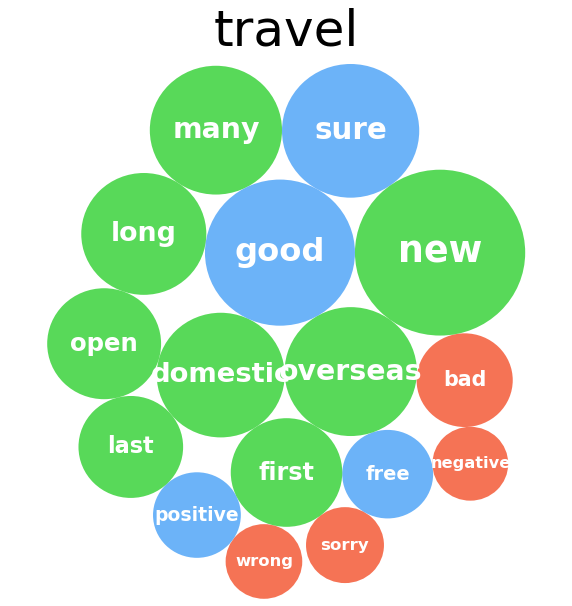

In [21]:
# Tf-idf 기반으로 수행
keyword = input("단어를 입력하세요: ")

ranking = tfidf_adj(keyword)
draw_bubble_chart(ranking)